In [1]:
import matplotlib.pyplot as plt
import torch

import sys
sys.path.append("../")

from prototype.user_profile_host import UserProfileHost
from prototype.constants import RecommendationType

In [2]:
# Fit TSNE Representation Module from sklearn
toy_uph = UserProfileHost(original_prompt='test', recommendation_type=RecommendationType.WEIGHTED_AXES, cache_dir='../cache/')

# Run a few iterations to gather some points
for i in range(100):
    embeds, latents = toy_uph.generate_recommendations(num_recommendations=5)
    scores = torch.rand(size=(5,))
    toy_uph.fit_user_profile(preferences=scores)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

# TSNE transformation

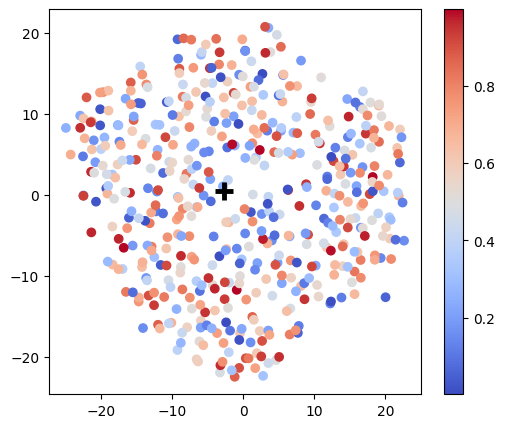

In [3]:
low_d_user_profile, low_d_embeddings, preferences = toy_uph.plotting_utils(algorithm='tsne')

# PLot Embeddings with respective scores
cmap = plt.get_cmap('coolwarm')
fig = plt.figure(figsize=(6,5))
p = plt.scatter(low_d_embeddings[:, 0], low_d_embeddings[:, 1], c=preferences, cmap=cmap)
plt.colorbar(mappable=p)
plt.scatter(low_d_user_profile[0], low_d_user_profile[1], c='black', s=150, marker='+', linewidth=3.5)
plt.show()

# PCA transformation

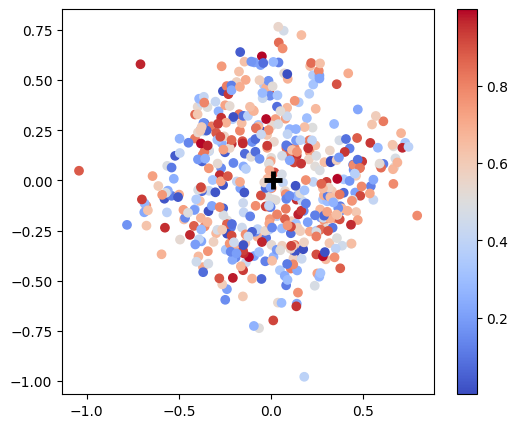

In [4]:
low_d_user_profile, low_d_embeddings, preferences = toy_uph.plotting_utils(algorithm='pca')

# PLot Embeddings with respective scores
cmap = plt.get_cmap('coolwarm')
fig = plt.figure(figsize=(6,5))
p = plt.scatter(low_d_embeddings[:, 0], low_d_embeddings[:, 1], c=preferences, cmap=cmap)
plt.colorbar(mappable=p)
plt.scatter(low_d_user_profile[0], low_d_user_profile[1], c='black', s=150, marker='+', linewidth=3.5)
plt.show()